In [4]:
from IPython.html import widgets

import matplotlib.pyplot as plt
import numpy as np

import seaborn 

from crane.data.selfeGridUtils import verticalCoordinates

# Figure setup
%matplotlib inline
seaborn.set_style('whitegrid')
seaborn.set_context("notebook", font_scale=2.0)


# Order matters here
plt.rcParams['figure.figsize'] = 20, 12
from IPython.core.display import HTML
HTML("<style>.container { width:100% !important; }</style>")


In [2]:
def add_subplot_axes(ax,rect,axisbg='w'):
     fig = plt.gcf()
     box = ax.get_position()
     width = box.width
     height = box.height
     inax_position  = ax.transAxes.transform(rect[0:2])
     transFigure = fig.transFigure.inverted()
     infig_position = transFigure.transform(inax_position)
     x = infig_position[0]
     y = infig_position[1]
     width *= rect[2]
     height *= rect[3]  # <= Typo was here
     subax = fig.add_axes([x,y,width,height],axisbg=axisbg)
     x_labelsize = subax.get_xticklabels()[0].get_size()
     y_labelsize = subax.get_yticklabels()[0].get_size()
     x_labelsize *= rect[2]**0.5
     y_labelsize *= rect[3]**0.5
     subax.xaxis.set_tick_params(labelsize=x_labelsize)
     subax.yaxis.set_tick_params(labelsize=y_labelsize)
     return subax

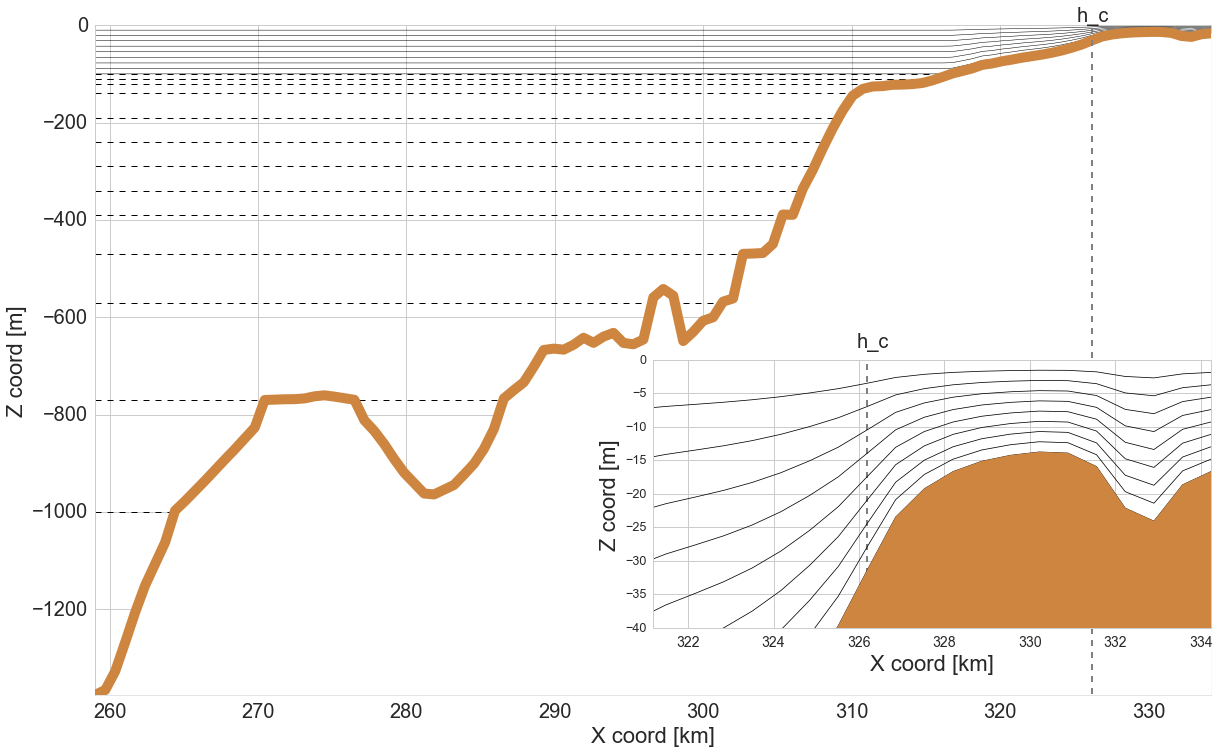

In [3]:
button=widgets.ToggleButton(description='Display z-levels')

@widgets.interact(nvrt=(3, 50, 1),
                  theta_f=(0.5, 10, 0.5),
                  theta_b=(0, 1, 0.1),
                  h_c=(5, 50, 5),
                  h_s=(50, 500, 50))
def plot_mesh(nvrt=10, theta_f=1, theta_b=0.7, h_c=30, h_s=100, zlevels=True):
    """Plot S & sigma levels for SELFE vertical grid."""

    
    # stupid
    z_trans = np.array([-1375.71606445, -1365.79821777, -1327.14501953, -1267.48352051,
       -1206.24926758, -1150.87927246, -1106.79223633, -1062.7052002 ,
        -997.37023926,  -977.74383545,  -956.87982178,  -935.98828125,
        -914.19885254,  -892.40948486,  -871.18151855,  -848.85070801,
        -826.66833496,  -769.99157715,  -769.277771  ,  -768.56396484,
        -768.31536865,  -766.80883789,  -762.4463501 ,  -760.41931152,
        -763.1362915 ,  -766.30078125,  -769.64459229,  -811.66583252,
        -833.74761963,  -860.70654297,  -891.54980469,  -919.62811279,
        -940.92102051,  -962.21398926,  -964.00830078,  -954.25238037,
        -944.496521  ,  -923.22784424,  -901.15948486,  -870.61914062,
        -829.64355469,  -766.87835693,  -749.82427979,  -733.63824463,
        -701.73126221,  -667.28912354,  -664.46057129,  -666.62207031,
        -656.49066162,  -642.15679932,  -652.66314697,  -639.82122803,
        -632.06341553,  -652.81707764,  -655.53521729,  -645.76098633,
        -559.30059814,  -541.92767334,  -555.68371582,  -648.94213867,
        -630.15570068,  -607.25720215,  -600.06085205,  -567.91491699,
        -561.46514893,  -469.7855835 ,  -469.12265015,  -468.01165771,
        -449.47763062,  -388.87600708,  -389.70376587,  -336.0723877 ,
        -297.47808838,  -253.39228821,  -212.22421265,  -175.4132843 ,
        -144.9683075 ,  -130.9868927 ,  -125.97099304,  -125.13005066,
        -122.47140503,  -122.03617859,  -121.03279114,  -118.70887756,
        -113.42871857,  -106.61615753,   -99.35868835,   -94.19242859,
         -88.8397522 ,   -81.54720306,   -78.60269928,   -74.05292511,
         -70.66445923,   -66.75652313,   -63.6464386 ,   -60.41575241,
         -56.59545517,   -51.92695999,   -46.22491837,   -39.68512726,
         -31.45621109,   -23.45415306,   -19.22788239,   -16.66083717,
         -15.11749554,   -14.23550224,   -13.735116  ,   -13.89635277,
         -15.91483307,   -22.1222496 ,   -24.05826187,   -18.62838936,
         -16.63441277], dtype=np.float32)

    x_trans = np.array([ 259030.625   ,  259702.203125,  260373.765625,  261045.328125,
        261716.890625,  262388.46875 ,  263060.03125 ,  263731.59375 ,
        264403.15625 ,  265074.71875 ,  265746.28125 ,  266417.875   ,
        267089.4375  ,  267761.      ,  268432.5625  ,  269104.125   ,
        269775.6875  ,  270447.25    ,  271118.8125  ,  271790.375   ,
        272461.9375  ,  273133.5     ,  273805.0625  ,  274476.65625 ,
        275148.21875 ,  275819.78125 ,  276491.34375 ,  277162.90625 ,
        277834.46875 ,  278506.03125 ,  279177.59375 ,  279849.1875  ,
        280520.75    ,  281192.3125  ,  281863.875   ,  282535.4375  ,
        283207.      ,  283878.5625  ,  284550.125   ,  285221.6875  ,
        285893.25    ,  286564.8125  ,  287236.375   ,  287907.96875 ,
        288579.53125 ,  289251.09375 ,  289922.65625 ,  290594.21875 ,
        291265.78125 ,  291937.34375 ,  292608.9375  ,  293280.5     ,
        293952.0625  ,  294623.625   ,  295295.1875  ,  295966.75    ,
        296638.3125  ,  297309.875   ,  297981.4375  ,  298653.      ,
        299324.59375 ,  299996.125   ,  300667.71875 ,  301339.28125 ,
        302010.84375 ,  302682.40625 ,  303353.96875 ,  304025.53125 ,
        304697.125   ,  305368.6875  ,  306040.25    ,  306711.8125  ,
        307383.375   ,  308054.9375  ,  308726.5     ,  309398.0625  ,
        310069.625   ,  310741.1875  ,  311412.75    ,  312084.3125  ,
        312755.90625 ,  313427.46875 ,  314099.03125 ,  314770.59375 ,
        315442.15625 ,  316113.71875 ,  316785.28125 ,  317456.875   ,
        318128.4375  ,  318800.      ,  319471.5625  ,  320143.125   ,
        320814.6875  ,  321486.25    ,  322157.8125  ,  322829.375   ,
        323500.9375  ,  324172.5     ,  324844.0625  ,  325515.65625 ,
        326187.21875 ,  326858.78125 ,  327530.34375 ,  328201.90625 ,
        328873.46875 ,  329545.03125 ,  330216.59375 ,  330888.1875  ,
        331559.75    ,  332231.3125  ,  332902.875   ,  333574.4375  ,
        334246.      ], dtype=np.float32)
    
    z_levels = [-5000, -2300, -1800, -1400, -1000, -770, -570, -470, -390, -340, -290, -240, -190, -140, -120, -110, -110, -100]

    # compute grid
    sigma = np.linspace(-1, 0, nvrt)
    vgrid = verticalCoordinates(nvrt, 1, h_s, h_c, theta_b=theta_b, theta_f=theta_f, sigma=sigma)
    dp = z_trans*-1
    eta = np.zeros_like(dp)
    vcoords = vgrid.computeVerticalCoordinates(eta, dp)
    
    # plot grid
    f, ax = plt.subplots(1,1)

    x_trans = x_trans / 1000.0
    x = np.tile(x_trans, (nvrt, 1))
    ax.plot(x.T, vcoords[0].T, color='k', linewidth=0.5)
    
    # plot bathy
    ax.fill_between(x_trans, z_trans, z_trans.min(), color='white', zorder=3)
    ax.plot(x_trans, z_trans, color='peru', linewidth=10, zorder=3)
    if zlevels:
        for z in z_levels:
            #ax.axhline(z, xmin=x_trans.min(), xmax=x_trans.max(), color='k', linewidth=5)
            ax.plot([x_trans.min(), x_trans.max()], [z, z], color='k', linewidth=1, linestyle='--')

    # Labels and such
    ax.set_ylabel('Z coord [m]')
    ax.set_xlabel('X coord [km]')
    ax.set_ylim([z_trans.min(), 0])
    ax.set_xlim([x_trans.min(), x_trans.max()])
    # - h_c line
    hc_ix = (np.abs(dp - h_c)).argmin()
    ax.axvline(x=x_trans[hc_ix], ymin=-dp[hc_ix], ymax=dp[0], linewidth=2, color='grey', linestyle='--', zorder=10)
    ax.text(x_trans[hc_ix]-1, 8, 'h_c', zorder=10, fontsize=20)
    
    # Add inset
    sub_rect = [0.5, 0.1, 0.5, 0.4]
    sub_ax = add_subplot_axes(ax, sub_rect)
    sub_ax.axvline(x=x_trans[hc_ix], ymin=-dp[hc_ix], ymax=dp[0], linewidth=2, color='grey', linestyle='--')
    sub_ax.text(x_trans[hc_ix]-0.25, 2, 'h_c', fontsize=20)
    sub_ax.fill_between(x_trans, z_trans, z_trans.min(), color='peru', zorder=3)
    sub_ax.set_xlim([x_trans[hc_ix]-5, x_trans.max()])
    sub_ax.set_ylim([-40, 0])
    sub_ax.plot(x.T, vcoords[0].T, color='k', linewidth=0.75)
    sub_ax.set_ylabel('Z coord [m]')
    sub_ax.set_xlabel('X coord [km]')
